In [57]:
import seaborn as sns
import random
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

9. We downloaded data with weight (in pounds) and age (in years) from a random sample of American adults. We created a new variables, age10 = age/10. We then fit a regression:

```r
lm(formula = weight ~ age10)
            coef.est coef.se
(Intercept)    161.0     7.3
age10            2.6     1.6
  n = 2009, k = 2
  residual sd = 119.7, R-Squared = 0.00
```
Make a graph of weight versus age (that is, weight in pounds on y-axis, age in years on x-axis). Label the axes appropriately, draw the fitted regression line, and make a scatterplot of a bunch of points consistent with the information given and with ages ranging roughly uniformly between 18 and 90.

#### Analytical

In [268]:
x = range(18,91)
y = [random.normalvariate(161, 7.3) +  random.normalvariate(0.26*a, 16) for a in x]

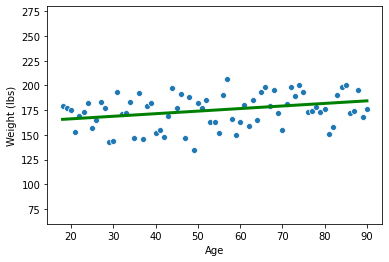

In [269]:
ax = sns.scatterplot(x,y)
plt.plot([18, 90], [161 + (0.26 * 18), 161 + (0.26 * 90)], linewidth=3, c='green', alpha=1)
ax.set(xlabel='Age', ylabel='Weight (lbs)', ylim=[60,280])
plt.show()

#### With simulation

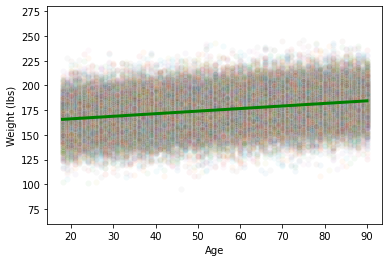

In [267]:
for i in range(1000):
    y = [random.normalvariate(161, 7.3) + random.normalvariate(0.26*a, 16) for a in x]
    ax = sns.scatterplot(x,y, alpha=0.05)

plt.plot([18, 90], [161 + (2.6 * 1.8), 161 + (2.6 * 9)], linewidth=3, c='green', alpha=1)    
ax.set(xlabel='Age', ylabel='Weight (lbs)', ylim=[60,280])
plt.show()

#### With stan simulation and fit

In [ ]:
'''
data {
    int N;
}
transformed data {
    real intercept = 161.0;
    real age10 = 0.26;
    real interceptse = 7.3;
    real age10se = 16.0;
    int v = 73;
}
generated quantities {
    matrix[N, v] y_sim;
    
    for (i in 1:N) {
        for(ii in 18:90) {
            real ageco = age10 * ii;
            real ise = normal_rng(0, interceptse);
            real agese = normal_rng(0, age10se);
            y_sim[i, ii - 17] = intercept + ise + ageco + agese;
        }
    }
}
'''

In [225]:
N = 100
regression_model = CmdStanModel(stan_file='exercise9.stan')
regression_model.compile()
regression_fit = regression_model.sample(output_dir='./output', data={'N': N}, fixed_param=True)

INFO:cmdstanpy:compiling stan program, exe file: /Users/spetulla/Workspace/Sandbox/ds-practice/Regression/exercise9
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/spetulla/Workspace/Sandbox/ds-practice/Regression/exercise9
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /Users/spetulla/Workspace/Sandbox/ds-practice/Regression/exercise9
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [271]:
x, y = [], []
# stan generates a lot of samples.. we only use 1%!
for ii in range(0, 10):
    for i, j in enumerate(regression_fit.sample[ii][0]):
        i -= 2
        if i > 0:
            x.append((i // 100) + 17)
            y.append(j)

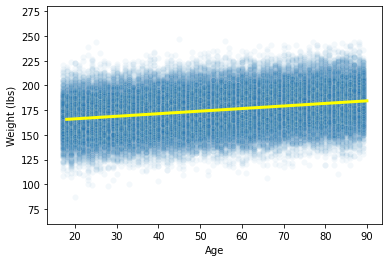

In [273]:
ax = sns.scatterplot(x, y, alpha=0.05)
plt.plot([18, 90], [161 + (2.6 * 1.8), 161 + (2.6 * 9)], linewidth=3, c='yellow', alpha=1)
ax.set(xlabel='Age', ylabel='Weight (lbs)', ylim=[60,280])
plt.show()

Another approach is to refit the model for baches of simulated data, aka bootstrapping confidence intervals. See question 11 for an example.